In [1]:
from segment_anything import build_sam, SamPredictor, SamAutomaticMaskGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
img = cv2.imread("movenet_files\\toastmasters_test_image.JPG")

## Open OC Human

In [4]:
from modeling.build_model import Pose2Seg
from MoveNet_Model import MoveNet_Predictor
import torch
from torchvision import transforms
from datasets.CocoDatasetInfo import CocoDatasetInfo, annToMask
import cv2
ImageRoot = './data/OCHuman/images'
AnnoFile = './data/OCHuman/annotations/ochuman_coco_format_val_range_0.00_1.00.json'
ochuman_datainfos = CocoDatasetInfo(ImageRoot, AnnoFile, onlyperson=True, loadimg=True)

loading annotations into memory...
Done (t=0.11s)
creating index...
index created!


In [5]:
rawdata = ochuman_datainfos[2]
img = rawdata['data']
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # change to RGB
image_id = rawdata['id']

height, width = img.shape[0:2]
gt_kpts = np.float32(rawdata['gt_keypoints']).transpose(0, 2, 1) # (N, 17, 3)
gt_segms = rawdata['segms']
gt_masks = np.array([annToMask(segm, height, width) for segm in gt_segms])

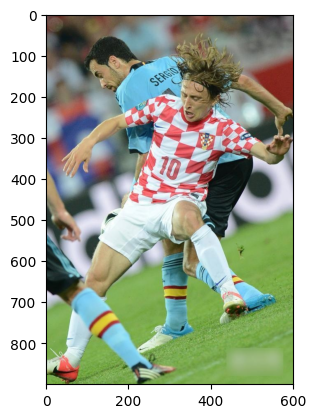

In [6]:
plt.imshow(img)
plt.show()

In [7]:
print('===========> loading model <===========')
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Pose2Seg().to(device)
model.init("snapshot/April_first_best_pose2seg.pkl")
model.eval()
print()

===========> loading model <===========
total params in model is 334, in pretrained model is 336, init 334



In [8]:
output = model([img], [gt_kpts])
len(output[0]),type(output),output[0][0].shape

c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 256, 128, 128])


c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


(2, list, (900, 602))

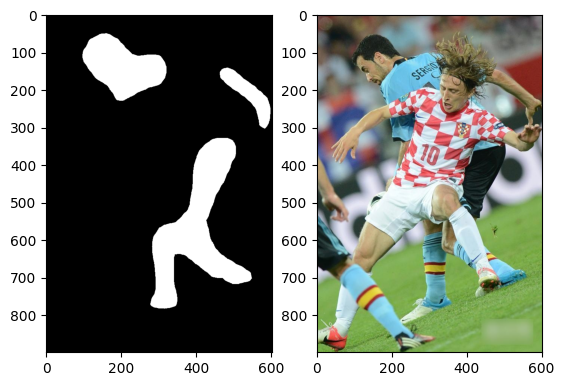

In [10]:
plt.subplot(1,2,1)
plt.imshow(output[0][1],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

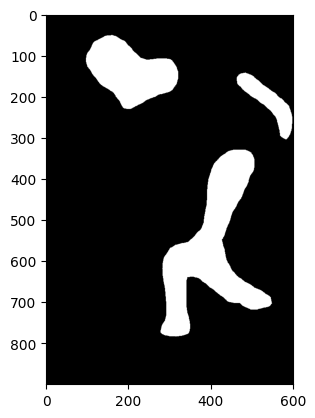

In [12]:
plt.imshow(output[0][1],cmap='gray')
plt.imsave("pose2seg_output/soccer_pose2seg_mask.jpg",output[0][1],cmap='gray')
plt.show()

## Getting Pose2Seg Mask Output

In [4]:
from modeling.build_model import Pose2Seg
from MoveNet_Model import MoveNet_Predictor
import torch
from torchvision import transforms
from datasets.CocoDatasetInfo import CocoDatasetInfo, annToMask
import cv2

In [5]:
ImageRoot = './data/coco2017/val2017'
AnnoFile = './data/coco2017/annotations/person_keypoints_val2017_pose2seg.json'
datainfos = CocoDatasetInfo(ImageRoot, AnnoFile, onlyperson=True, loadimg=True)
rawdata = datainfos[5]
img = rawdata['data']
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # change to RGB
image_id = rawdata['id']

height, width = img.shape[0:2]
gt_kpts = np.float32(rawdata['gt_keypoints']).transpose(0, 2, 1) # (N, 17, 3)
gt_segms = rawdata['segms']
gt_masks = np.array([annToMask(segm, height, width) for segm in gt_segms])

loading annotations into memory...
Done (t=0.60s)
creating index...
index created!


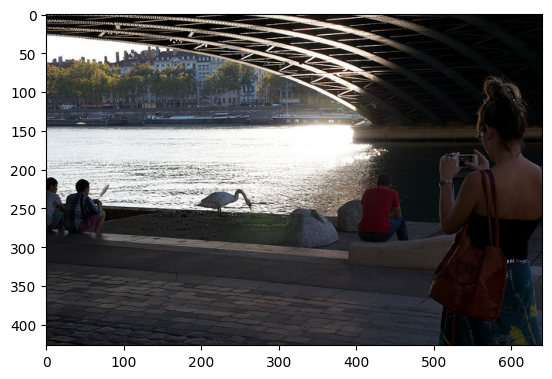

In [10]:
rawdata = datainfos[5]
img = rawdata['data']
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # change to RGB
image_id = rawdata['id']
height, width = img.shape[0:2]
gt_kpts = np.float32(rawdata['gt_keypoints']).transpose(0, 2, 1) # (N, 17, 3)
gt_segms = rawdata['segms']
gt_masks = np.array([annToMask(segm, height, width) for segm in gt_segms])
plt.imshow(img)
plt.show()

In [11]:
print('===========> loading model <===========')
device = "cuda" if torch.cuda.is_available() else "cpu"
model = Pose2Seg().to(device)
model.init("snapshot/April_first_best_pose2seg.pkl")
model.eval()
print()

===========> loading model <===========
total params in model is 334, in pretrained model is 336, init 334



In [12]:
# one_kpt = np.expand_dims(gt_kpts[2],axis=0) # expand dims to make one_kpt 3D
output = model([img], [gt_kpts])

c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 256, 128, 128])


c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [13]:
len(output[0]),type(output),output[0][0].shape

(4, list, (427, 640))

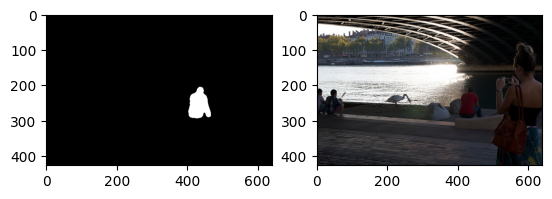

In [14]:
plt.subplot(1,2,1)
plt.imshow(output[0][2],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(img)
plt.show()

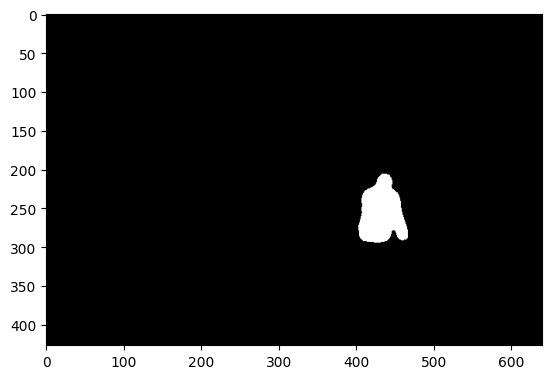

In [17]:
plt.imshow(output[0][2],cmap='gray')
plt.imsave("pose2seg_output/boat_pose2seg_mask.jpg",output[0][2],cmap='gray')
plt.show()

In [193]:
np.unique(output[0][0])

array([0, 1], dtype=uint8)

In [147]:
output[0][0].shape,img.shape

((427, 640), (427, 640, 3))

In [194]:
lama_path = "C:/Users/Aditya Ojha/Music/CV_Graduate/lama/"
plt.imsave(lama_path+"testing_imgs/boat.jpg",img)
plt.imsave(lama_path+"testing_masks/boat_mask.jpg",output[0][2],cmap='gray')

In [195]:
np.save(lama_path+"testing_masks/boat_mask",output[0][2])

In [121]:
# to run the model we need to give imgs and keypoints
img = plt.imread("movenet_files\\jumping_photobomber.JPG") # image
mdl = MoveNet_Predictor() # init movenet model
keypoints_with_scores = mdl.predict(img) # make predictions
print(keypoints_with_scores)

[[[[0.36102676 0.77530766 0.61860615]
   [0.33815402 0.78772825 0.5066408 ]
   [0.3375568  0.76188636 0.40609586]
   [0.34633404 0.8095421  0.36635137]
   [0.3387183  0.7389228  0.36369735]
   [0.46167633 0.8363925  0.57365066]
   [0.46249408 0.70996517 0.43197343]
   [0.5879037  0.8452918  0.48104206]
   [0.5795212  0.71549386 0.27275306]
   [0.66981095 0.83578503 0.37348986]
   [0.7009749  0.7380389  0.51775265]
   [0.7135605  0.80571693 0.44301647]
   [0.6916746  0.7096161  0.2550012 ]
   [0.89541626 0.8111083  0.40132374]
   [0.89065    0.72504556 0.20332412]
   [0.9880488  0.8170468  0.27667555]
   [0.9853558  0.69314736 0.20210792]]]]


In [122]:
# pose2seg's draw kpts doesn't work
def draw_keypoints(frame, keypoints, confidence):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    for kp in shaped:
        ky, kx, conf = kp
        if conf > confidence:
            cv2.circle(frame,(int(kx),int(ky)), 4,(0,255,0),-1)
def draw_connections(frame, keypoints, edges, confidence_threshold):
    y, x, c = frame.shape
    shaped = np.squeeze(np.multiply(keypoints, [y,x,1]))
    for edge, color in edges.items():
        p1, p2 = edge
        y1, x1, c1 = shaped[p1]
        y2, x2, c2 = shaped[p2]
        if (c1 > confidence_threshold) & (c2 > confidence_threshold):      
            cv2.line(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,0,255), 2)
EDGES = {
    (0, 1): 'm',
    (0, 2): 'c',
    (1, 3): 'm',
    (2, 4): 'c',
    (0, 5): 'm',
    (0, 6): 'c',
    (5, 7): 'm',
    (7, 9): 'm',
    (6, 8): 'c',
    (8, 10): 'c',
    (5, 6): 'y',
    (5, 11): 'm',
    (6, 12): 'c',
    (11, 12): 'y',
    (11, 13): 'm',
    (13, 15): 'm',
    (12, 14): 'c',
    (14, 16): 'c'
}

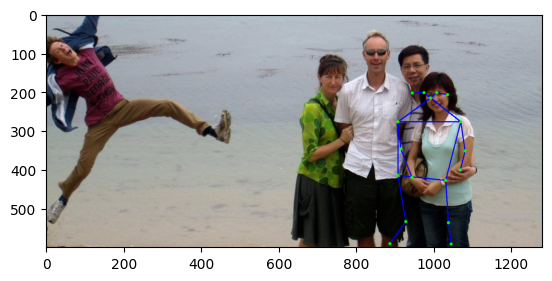

In [123]:
draw_img = img.copy()
draw_connections(draw_img,keypoints_with_scores,EDGES,0.2)
draw_keypoints(draw_img,keypoints_with_scores,0.2)
plt.imshow(draw_img)

In [124]:
tmp_img = img/np.max(img)
tmp_img = np.transpose(tmp_img,(2,0,1))
tmp_tensor = torch.Tensor(tmp_img)
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                std=[0.229, 0.224, 0.225])
tmp_tensor = normalize(tmp_tensor)
# back to channels at the end
tmp_tensor = torch.permute(tmp_tensor,(1,2,0))
# make into numpy 
tmp_img = tmp_tensor.numpy()
tmp_img.shape,keypoints_with_scores.shape

((600, 1280, 3), (1, 1, 17, 3))

In [125]:
new_keypoints = np.zeros((1,17,3))
for idx in range(len(keypoints_with_scores[0][0])):
    y,x,conf = keypoints_with_scores[0][0][idx]
    if conf <= 0.2:
        new_keypoints[0][idx] = np.array([0,0,0])
    else:
        new_keypoints[0][idx] = np.array([y,x,2])
new_keypoints

array([[[0.36102676, 0.77530766, 2.        ],
        [0.33815402, 0.78772825, 2.        ],
        [0.33755681, 0.76188636, 2.        ],
        [0.34633404, 0.80954212, 2.        ],
        [0.3387183 , 0.73892277, 2.        ],
        [0.46167633, 0.83639252, 2.        ],
        [0.46249408, 0.70996517, 2.        ],
        [0.58790368, 0.84529179, 2.        ],
        [0.57952118, 0.71549386, 2.        ],
        [0.66981095, 0.83578503, 2.        ],
        [0.70097488, 0.7380389 , 2.        ],
        [0.71356052, 0.80571693, 2.        ],
        [0.69167459, 0.70961612, 2.        ],
        [0.89541626, 0.81110829, 2.        ],
        [0.89064997, 0.72504556, 2.        ],
        [0.98804879, 0.81704682, 2.        ],
        [0.98535579, 0.69314736, 2.        ]]])

In [126]:
y, x, c = img.shape
shaped = np.squeeze(np.multiply(new_keypoints, [y,x,1]))
shaped = shaped.astype(int)
shaped[:,-1] = 2
shaped = shaped.astype(float)
shaped

array([[ 216.,  992.,    2.],
       [ 202., 1008.,    2.],
       [ 202.,  975.,    2.],
       [ 207., 1036.,    2.],
       [ 203.,  945.,    2.],
       [ 277., 1070.,    2.],
       [ 277.,  908.,    2.],
       [ 352., 1081.,    2.],
       [ 347.,  915.,    2.],
       [ 401., 1069.,    2.],
       [ 420.,  944.,    2.],
       [ 428., 1031.,    2.],
       [ 415.,  908.,    2.],
       [ 537., 1038.,    2.],
       [ 534.,  928.,    2.],
       [ 592., 1045.,    2.],
       [ 591.,  887.,    2.]])

In [127]:
np.expand_dims(shaped,axis=0).shape

(1, 17, 3)

In [128]:
# batchimgs: a list of array (H, W, 3) images
# batchkpts: a list of array (m, 17, 3) keypoints, m is number of people
batchimgs = [tmp_img]
batchkpts = [np.expand_dims(shaped,axis=0)] # now the shape is 1,17,3

In [129]:
output = model(batchimgs,batchkpts)
output = np.array(output)
output.shape

c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


torch.Size([1, 256, 128, 128])


c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4289: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\Aditya Ojha\Music\CV_Graduate\Photo-Bomb-Diffuser\Other_Repos\Pose2Seg\venv_pose2seg\lib\site-packages\torch\nn\functional.py:4227: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


(1, 1, 600, 1280)

In [130]:
np.max(output[0][0]),np.min(output[0][0])

(0, 0)

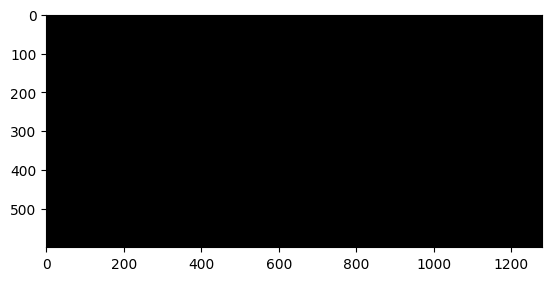

In [131]:
plt.imshow(output[0][0],cmap="gray")

## Getting SAM Mask Output

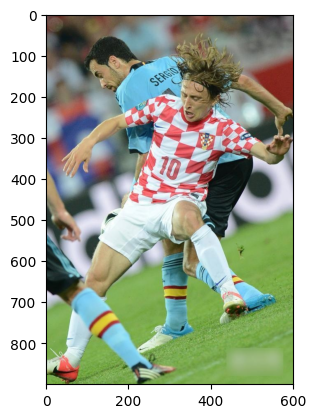

In [17]:
# img = cv2.imread("C:/Users/Aditya Ojha/Music/CV_Graduate/Test_Imgs/jumping_photobomber.jpg")
plt.imshow(img)
plt.show()

In [19]:
# plt.imsave("C:/Users/Aditya Ojha/Music/CV_Graduate/lama/testing_imgs/soccer.jpg",img)

In [3]:
mask_generator = SamAutomaticMaskGenerator(build_sam(checkpoint="sam_vit_h_4b8939.pth"))
masks = mask_generator.generate(img) # 9 mins for inference

In [4]:
# RLE- Run Length Encoding
# RLE to mask converter from : https://www.kaggle.com/code/robertkag/rle-to-mask-converter
def rleToMask(rleString,height,width):
    rows,cols = height,width
    rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
    rlePairs = np.array(rleNumbers).reshape(-1,2)
    img = np.zeros(rows*cols,dtype=np.uint8)
    for index,length in rlePairs:
        index -= 1
        img[index:index+length] = 255
    img = img.reshape(cols,rows)
    img = img.T
    return img

In [41]:
mask_dict = masks[7]
mask_dict.keys()

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])

In [42]:
seg_example = mask_dict["segmentation"]
type(seg_example),seg_example.shape

(numpy.ndarray, (2320, 3088))

In [43]:
stacked_mask = np.stack((seg_example,)*3, axis=-1)
stacked_mask.shape

(2320, 3088, 3)

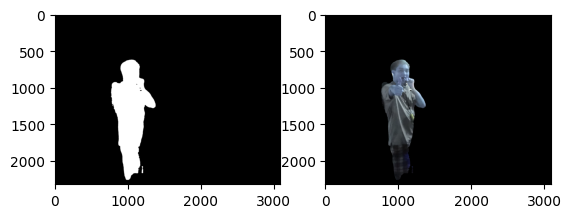

In [44]:
masked_img = np.multiply(stacked_mask,img)
fig, ax = plt.subplots(nrows=1,ncols=2)
ax[0].imshow(seg_example,cmap="gray")
ax[1].imshow(masked_img)
plt.show()

In [48]:
plt.imsave("marc_mask.png",seg_example)

In [14]:
# need a function that can find a mask given a single point the user puts in
# since the model can use prompting we can use multiple clicks to refine what mask we want
print("Building Model")
predictor = SamPredictor(build_sam(checkpoint="sam_vit_h_4b8939.pth"))
print("Creating Image Embeddings")
predictor.set_image(img) # 1 m 40 sec for loading image embedding

Building Model
Creating Image Embeddings


Start of Interactive Prompting Session


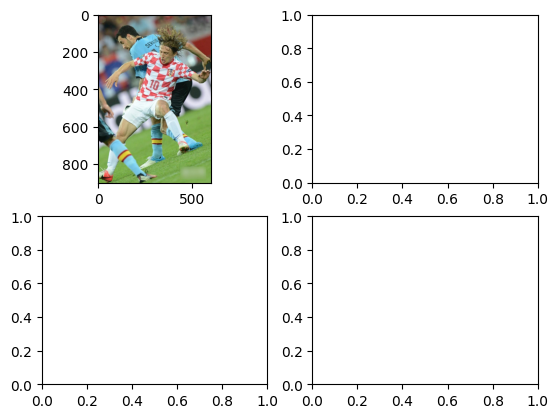

[[250 200]]
<class 'numpy.ndarray'> (3, 900, 602)


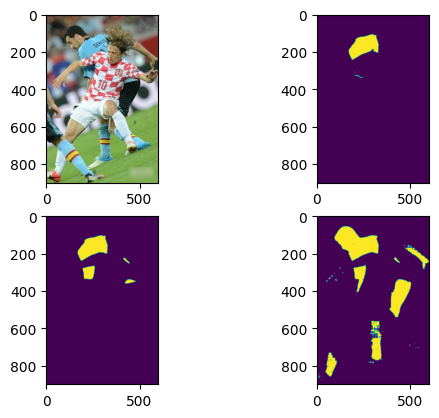

[[250 200]
 [500 650]]
<class 'numpy.ndarray'> (3, 900, 602)


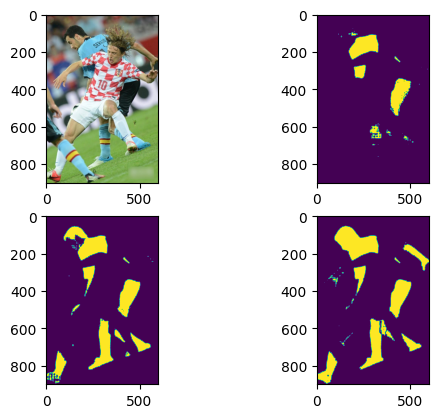

End of Interactive Mask-Prompting Session


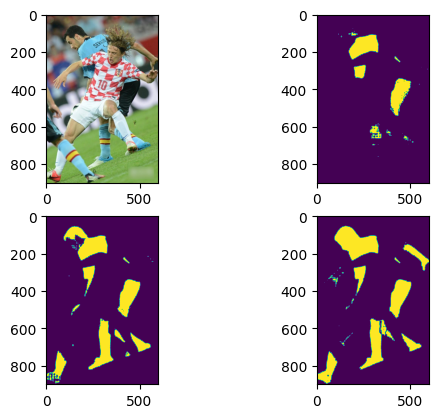

In [15]:
print("Start of Interactive Prompting Session")
fig, ax = plt.subplots(nrows=2,ncols=2)
ax[0][0].imshow(img)
display.display(plt.gcf())
user = input("What coordinate for click?")
pt_coor = []
pt_label = []
while user != "n":
    # extract coordinates
    coordinates = user.split(",")
    x,y = int(coordinates[0]),int(coordinates[1])
    pt_coor.append([x,y])
    print(np.array(pt_coor))
    pt_label.append(1)
    # run prediction
    masks,_,_ = predictor.predict(point_coords=np.array(pt_coor),
                                  point_labels=np.array(pt_label))
    print(type(masks),masks.shape)
    ax[0][0].imshow(img)
    ax[0][1].imshow(masks[0])
    ax[1][0].imshow(masks[1])
    ax[1][1].imshow(masks[2])
    display.display(plt.gcf())
    user = input("What coordinate for click?")
print("End of Interactive Mask-Prompting Session")

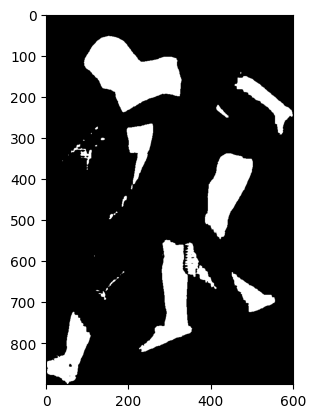

In [16]:
plt.imshow(masks[2],cmap='gray')
plt.imsave("SAM_output/soccer_SAM_mask.jpg",masks[2],cmap='gray')
plt.show()